In [6]:
import pandas as pd
A=pd.read_csv("C:/Users/LENOVO/Downloads/Cars93.csv")

In [7]:
A.head(5)   

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [8]:
B=A[["MPG.city","Price"]]

In [9]:
B.describe()

,MPG.city,Price
count,93.000000,93.000000
mean,22.365591,19.509677
std,5.619812,9.659430
min,15.000000,7.400000
25%,18.000000,12.200000
50%,21.000000,17.700000
75%,25.000000,23.300000
max,46.000000,61.900000


# preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
C=pd.DataFrame(ss.fit_transform(B),columns=B.columns)

In [11]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
model=km.fit(C)
model.labels_

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1])

# plot these clusters

In [12]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'price vs mileage')

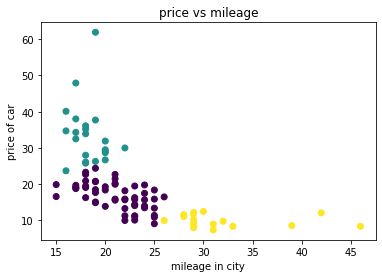

In [13]:
plt.scatter(B["MPG.city"],B["Price"],c=model.labels_)
plt.xlabel("mileage in city")
plt.ylabel("price of car")
plt.title("price vs mileage")

In [14]:
model.cluster_centers_

array([[-0.23437376, -0.28127091],
       [-0.72410737,  1.46141368],
       [ 1.68156148, -0.99779245]])

In [15]:
model.inertia_

55.24519288386834

In [16]:
centers=ss.inverse_transform(model.cluster_centers_)
Q=pd.DataFrame(centers,columns=["X","Y"])

In [17]:
Q

,X,Y
0,21.055556,16.807407
1,18.318182,33.550000
2,31.764706,9.923529


Text(0.5, 1.0, 'Price vs Mileage')

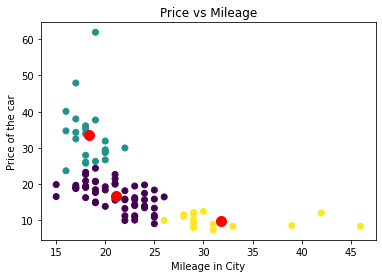

In [18]:
plt.scatter(B["MPG.city"],B["Price"],c=model.labels_)
plt.scatter(Q.X,Q.Y,s=100,c="red")
plt.xlabel("Mileage in City")
plt.ylabel("Price of the car")
plt.title("Price vs Mileage")

# Elbow curve to find best number of cluster

In [21]:
K=[]
WCSS=[]
for i in range(1,20,1):
    km=KMeans(n_clusters=i)
    model=km.fit(C)
    K.append(i)
    WCSS.append(model.inertia_)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
K

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [23]:
WCSS

[186.0,
 93.92806219538846,
 55.24519288386834,
 38.06526065774016,
 25.743307121066692,
 17.33210317456429,
 13.937266751712855,
 11.393038900507047,
 9.883856951269683,
 8.670187748642972,
 7.842524323800964,
 6.896361322160942,
 6.177977692593396,
 5.563373747951375,
 4.744528203489537,
 4.395923969896831,
 3.9696322473887813,
 3.6132971010462014,
 3.4299114786065057]

([<matplotlib.axis.XTick at 0x1dcc1c1aa30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

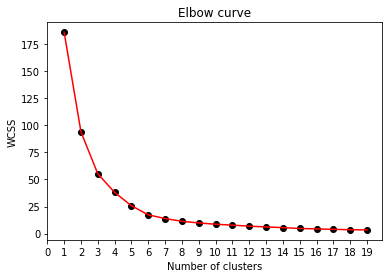

In [28]:
plt.scatter(K,WCSS,c="black")
plt.plot(K,WCSS,c="red")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow curve")
plt.xticks(range(0,20,1))

# Get cars recommendation

In [30]:
km = KMeans(n_clusters=4)
model = km.fit(C)
B["Clusters"]=model.labels_


<ipython-input-30-e1a2c08f314d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B["Clusters"]=model.labels_


In [31]:
B["Make"]=A.Make


<ipython-input-31-a1bc29534914>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  B["Make"]=A.Make


In [32]:
B

,MPG.city,Price,Clusters,Make
0,25,15.9,0,Acura Integra
1,18,33.9,1,Acura Legend
2,20,29.1,3,Audi 90
3,19,37.7,1,Audi 100
4,22,30.0,3,BMW 535i
...,...,...,...,...
88,17,19.7,3,Volkswagen Eurovan
89,21,20.0,3,Volkswagen Passat
90,18,23.3,3,Volkswagen Corrado
91,21,22.7,3,Volvo 240


In [33]:
cm = input("Enter a car Make to see similar cars: ")

cluster_number_of_given_car = list(B[B.Make==cm].Clusters)[0]

W = list(B[B.Clusters == cluster_number_of_given_car].Make)
W.remove(cm)

print("Entered Car: ",cm)
print("Similar Cars: ",W)


Enter a car Make to see similar cars: Chevrolet Corvette
Entered Car:  Chevrolet Corvette
Similar Cars:  ['Acura Legend', 'Audi 100', 'Cadillac DeVille', 'Cadillac Seville', 'Infiniti Q45', 'Lexus SC300', 'Lincoln Continental', 'Lincoln Town_Car', 'Mazda RX-7', 'Mercedes-Benz 190E', 'Mercedes-Benz 300E']
